In [67]:
import numpy as np
import pandas as pd

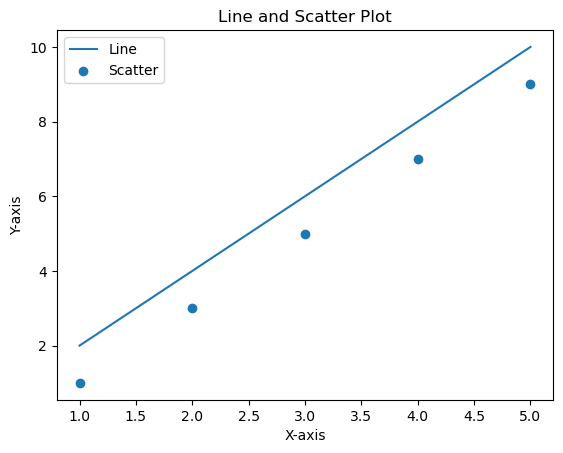

In [68]:
import matplotlib.pyplot as plt

# Create some sample data
x = [1, 2, 3, 4, 5]
y1 = [2, 4, 6, 8, 10]
y2 = [1, 3, 5, 7, 9]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the line
ax.plot(x, y1, label='Line')

# Plot the scatter points
ax.scatter(x, y2, label='Scatter')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Line and Scatter Plot')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [69]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

# encoding
from sklearn import preprocessing
# labeling all the features
le = preprocessing.LabelEncoder()
# encoded data set
weather_encoded=le.fit_transform(weather)
temp_encoded=le.fit_transform(temp)
play_encoded=le.fit_transform(play)

In [70]:
# print all the encoded data
print("Weather:",weather_encoded)
print("Temp:",temp_encoded)
print("Play:",play_encoded)

Weather: [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [71]:
# combine the features
features = list(zip(weather_encoded,temp_encoded))

# create naive bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(features, play_encoded)

In [72]:
# predict output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild

In [73]:
print("Predicted Value:", predicted)

Predicted Value: [1]


In [74]:
# example using wine data
import sklearn.datasets as datasets
wine = datasets.load_wine()

In [75]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [76]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [77]:
wine_data = pd.DataFrame(wine.data, columns=wine.feature_names)

In [78]:
wine_data['target'] = wine.target

In [79]:
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [80]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Import the necessary libraries

# Separate the features and target variables
X = wine_data.drop('target', axis=1)
y = wine_data['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

# Create the Gaussian Naive Bayes model
model = GaussianNB()

# Fit the model to the training data
model.fit(X_train, y_train)

GaussianNB()

In [81]:
# predict using x test data
y_predict = model.predict(X_test)

In [82]:
# count accuracy of the model
print("Accuracy of the model:", np.mean(y_predict == y_test))
from sklearn import metrics
print("accuracy data", metrics.accuracy_score(y_test, y_predict))

Accuracy of the model: 0.9074074074074074
accuracy data 0.9074074074074074


In [83]:
# Decision Tree model

import pandas as pd
from sklearn.tree import DecisionTreeClassifier

diabetes_pd = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv')
diabetes_pd.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
diabetes_pd.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [93]:
from sklearn.model_selection import train_test_split

# Separate the features and target variables
X = diabetes_pd.drop('Outcome', axis=1)
y = diabetes_pd['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [94]:
# create model for decision tree
model = DecisionTreeClassifier().fit(X_train, y_train)

In [95]:
# predict using x test data
y_predict = model.predict(X_test)

In [96]:
# accuracy of the model 
print("Accuracy of the model:", np.mean(y_predict == y_test))
from sklearn import metrics
print("Accuracy of the model:", metrics.accuracy_score(y_test, y_predict))

Accuracy of the model: 0.7467532467532467
Accuracy of the model: 0.7467532467532467


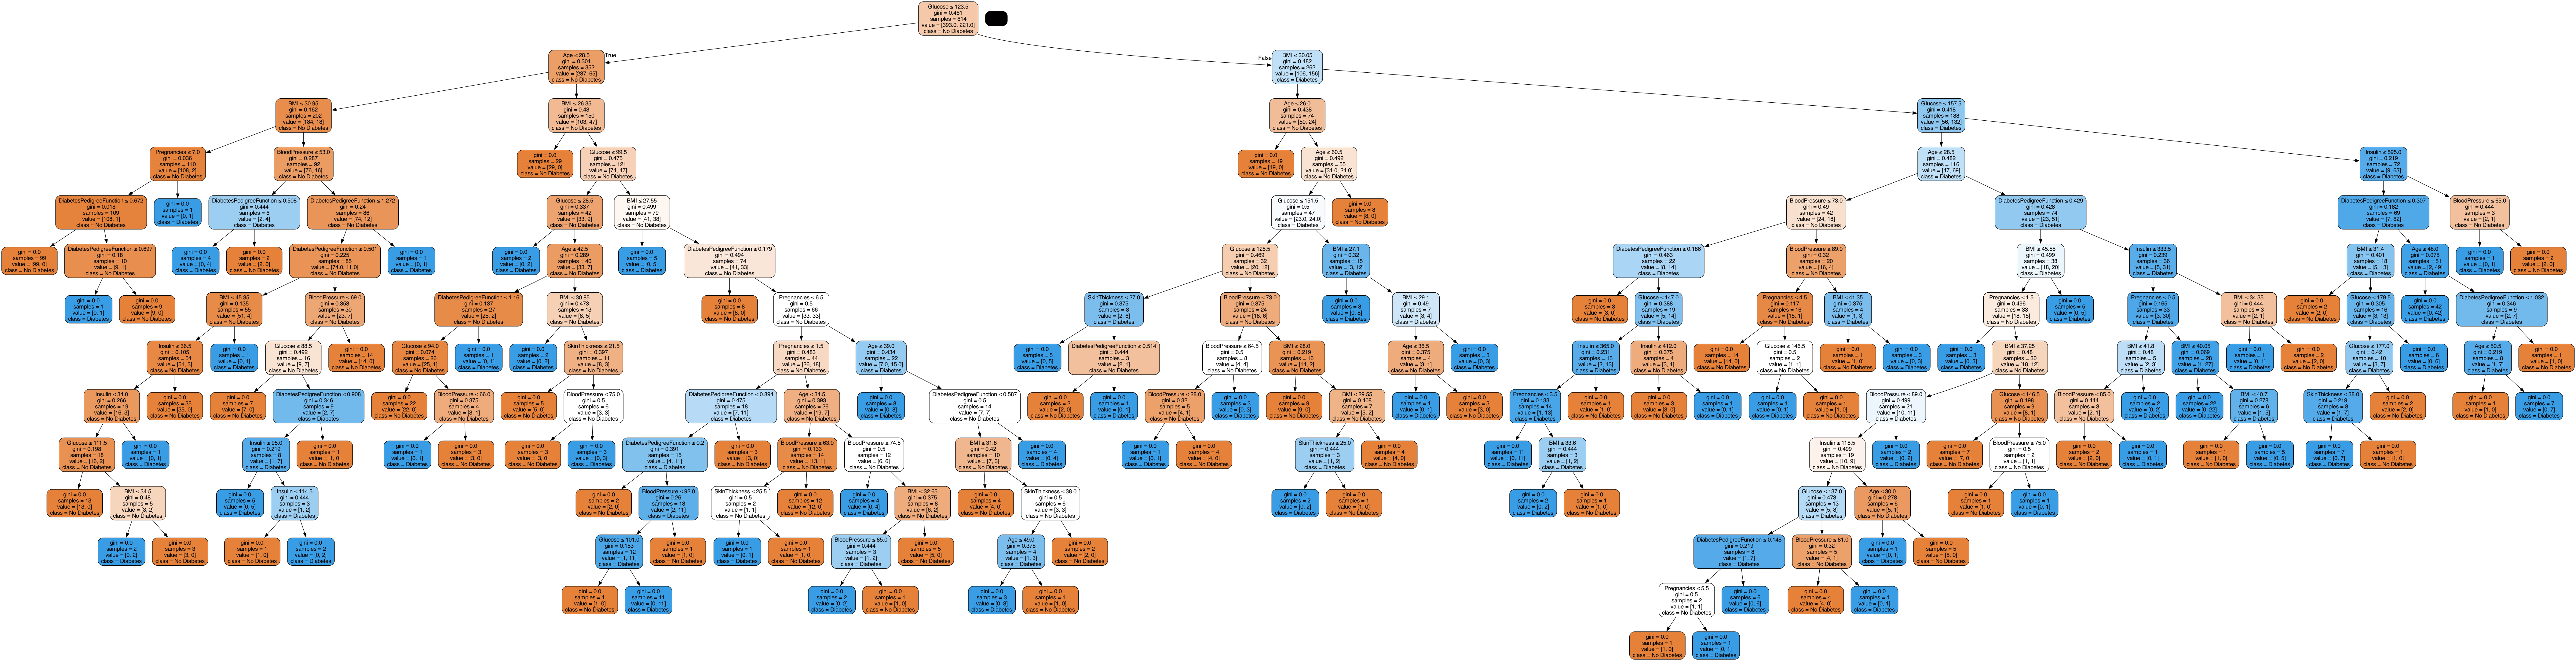

In [99]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Export the decision tree as a dot file
dot_data = export_graphviz(
    model, 
    out_file=None, 
    feature_names=X.columns, 
    class_names=['No Diabetes', 'Diabetes'], 
    filled=True, 
    rounded=True, 
    special_characters=True)

# Create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# Generate the decision tree visualization
Image(graph.create_png())

In [102]:
# create model for naive bayes
naive_bayes_model = GaussianNB().fit(X_train, y_train)
y_predict = naive_bayes_model.predict(X_test)
print("Accuracy of the model:", np.mean(y_predict == y_test))

Accuracy of the model: 0.7922077922077922


Accuracy of the model: 0.7597402597402597


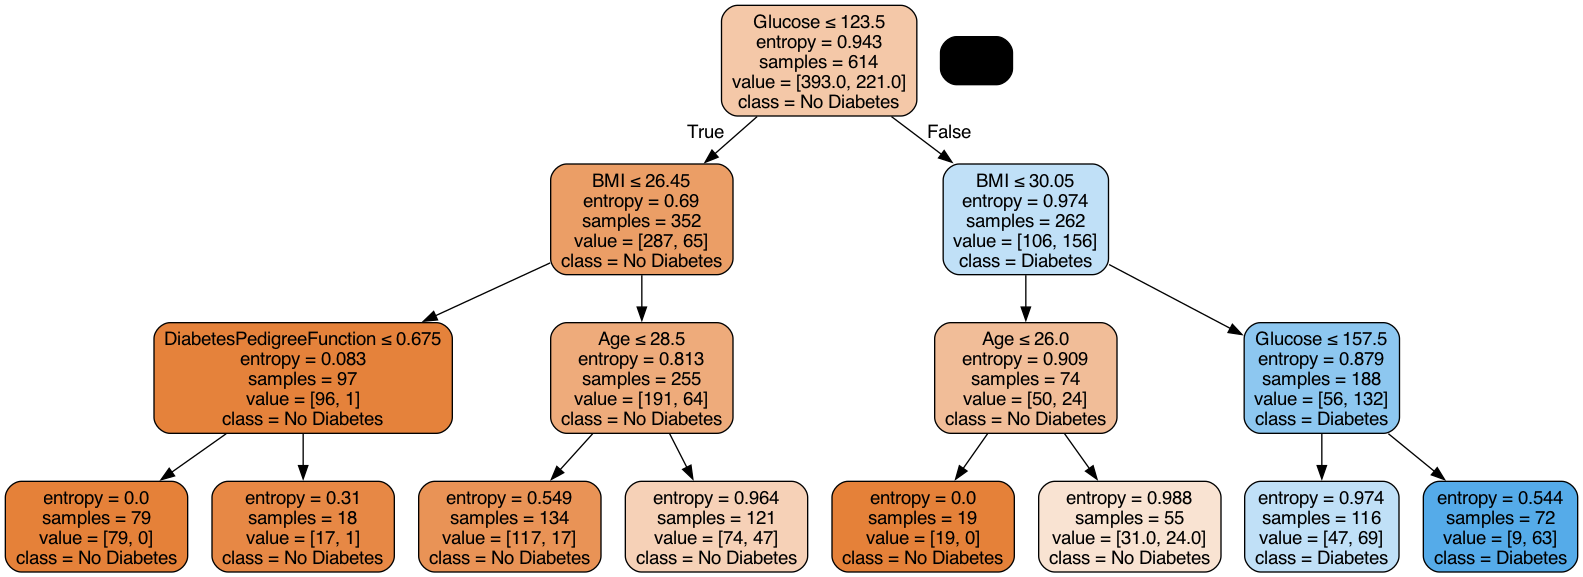

In [111]:
# optimizing decision tree model
optimized_decision_tree_model = DecisionTreeClassifier(max_depth=3, criterion="entropy").fit(X_train, y_train)
y_predict = optimized_decision_tree_model.predict(X_test)
# accuracy
print("Accuracy of the model:", np.mean(y_predict == y_test))
# Generate the decision tree visualization for the optimized model
dot_data_optimized = export_graphviz(
    optimized_decision_tree_model, 
    out_file=None, 
    feature_names=X.columns, 
    class_names=['No Diabetes', 'Diabetes'], 
    filled=True, 
    rounded=True, 
    special_characters=True)

# Create a graph from the dot data
graph_optimized = pydotplus.graph_from_dot_data(dot_data_optimized)

# Generate the decision tree visualization
Image(graph_optimized.create_png())

In [112]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
X_train.size

4912

In [123]:
random_forest_model = RandomForestClassifier(n_estimators=100, criterion="entropy").fit(X_train, y_train)
# accuracy
y_predict = random_forest_model.predict(X_test) 
print("Accuracy of the model:", np.mean(y_predict == y_test))

Accuracy of the model: 0.8181818181818182


In [126]:
# Random Forest
# find the important features
importances = random_forest_model.feature_importances_
importances

array([0.08365448, 0.23544967, 0.09008684, 0.07168159, 0.07289852,
       0.16286642, 0.135749  , 0.14761347])

In [127]:
series_of_important = pd.Series(importances, index=X.columns).sort_values(ascending=False)
series_of_important

Glucose                     0.235450
BMI                         0.162866
Age                         0.147613
DiabetesPedigreeFunction    0.135749
BloodPressure               0.090087
Pregnancies                 0.083654
Insulin                     0.072899
SkinThickness               0.071682
dtype: float64

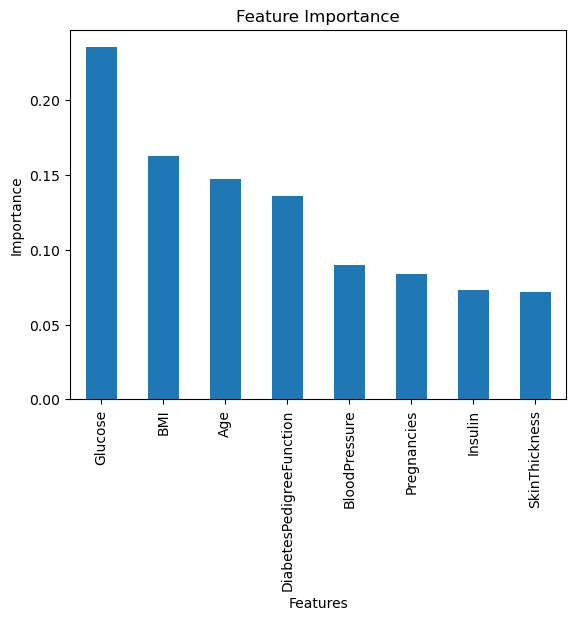

In [129]:
#
series_of_important.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [147]:
# generate model using importance features only 4 features
random_forest_model_important = RandomForestClassifier(n_estimators=1000).fit(X_train[series_of_important.index[:4]], y_train)
y_predict = random_forest_model_important.predict(X_test[series_of_important.index[:4]])
# accuracy
print("Accuracy of the model:", np.mean(y_predict == y_test))

Accuracy of the model: 0.7987012987012987


In [149]:
# SVM Model
# import breast cancer data
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()
# features
print("features", breast_cancer_data.feature_names)
# target
print("taget", breast_cancer_data.target_names)

features ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
taget ['malignant' 'benign']


In [150]:
# transform to dataframe
breast_cancer_df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [151]:
# print the target
print("target data", breast_cancer_data.target)

target data [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 

In [152]:
# splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_df, breast_cancer_data.target, test_size=0.2, random_state=0)

In [153]:
# create svm model
from sklearn.svm import SVC
svm_model = SVC(kernel='linear').fit(X_train, y_train)
y_predict = svm_model.predict(X_test)
# accuracy
print("Accuracy of the model:", np.mean(y_predict == y_test))   

Accuracy of the model: 0.956140350877193


In [157]:
# compare with naive bayes
naive_bayes_model = GaussianNB().fit(X_train, y_train)
y_predict = naive_bayes_model.predict(X_test)
print("accuracy of the model:", np.mean(y_predict == y_test))

accuracy of the model: 0.9298245614035088


In [159]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [161]:
print("Print Null Data", df.isnull().sum())

Print Null Data Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [171]:
# Classification using all models
# target => loan_status
# menentukan features yang paling berpengaruh dengan loan status

# data cleansing
# exploratory data analysis
# split data

# generating model
df[df['LoanAmount'].isnull() & df['Loan_Amount_Term'].isnull()]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64